# Dependence of the entrainment rate on the tangential velocity

In [7]:
import nugridpy.utils as utils
import numpy as np
import matplotlib.pyplot as plt
import nugridpy.astronomy as ast
%matplotlib nbagg
from parser import *

In [8]:
cases = ('D1', 'D8', 'D5', 'D6', 'D9', 'D10', 'D20', 'D23', 'D2')
mdot = np.zeros(len(cases))
vt = np.zeros(len(cases))

for i in range(len(cases)):
    fin_name = 'entrainment_rate_{:s}.txt'.format(cases[i])
    try:
        with open(fin_name, 'r') as fin:
            line = fin.readline()
            mdot[i] = parse_file(fin_name)['mdot']
            fin.close()
    except IOError:
        print "Error: Cannot read '{:s}'!".format(fin_name)
        
    fin_name = 'tangential_velocity_{:s}.txt'.format(cases[i])
    try:
        with open(fin_name, 'r') as fin:
            line = fin.readline()
            vt[i] = float(line.split()[0])
            fin.close()
    except IOError:
        print "Error: Cannot read '{:s}'!".format(fin_name)

<IPython.core.display.Javascript object>


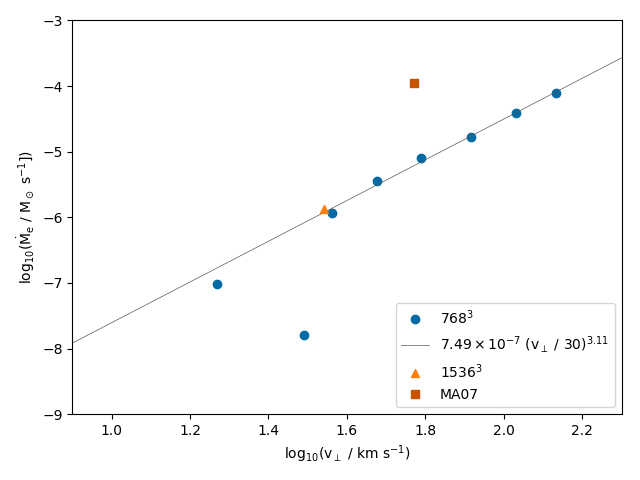

In [9]:
fc = np.polyfit(np.log(vt[0:6]/30.), np.log(mdot[0:6]), 1)
vt_fit = np.array((1e0, 1e3))
mdot_fit = np.exp(fc[0]*np.log(vt_fit/30.) + fc[1])

mdot0_str = '{:9e}'.format(np.exp(fc[1]))
tmp = mdot0_str.split('e')
mantissa = float(tmp[0])
exponent = int(tmp[1])
fit_label = r'${:.2f} \times 10^{{{:d}}}$ (v$_\perp$ / 30)$^{{{:.2f}}}$'.\
            format(mantissa, exponent, fc[0])

cb = utils.colourblind
ifig = 1; plt.close(ifig); plt.figure(ifig)
plt.plot(np.log10(vt[0:8]), np.log10(mdot[0:8]), ls = 'none', color = cb(5), marker = 'o', \
         label = '$768^3$')
plt.plot(np.log10(vt_fit), np.log10(mdot_fit), ls = '-', lw = 0.5, color = cb(4), \
         label = fit_label)
plt.plot(np.log10(vt[8]), np.log10(mdot[8]), ls = 'none', color = cb(1), marker = '^', \
         label = '$1536^3$')
plt.plot(np.log10(59.), np.log10(1.1e-4), ls = 'None', color = cb(8), marker = 's', \
         label = 'MA07')
plt.xlabel(r'log$_{10}$(v$_\perp$ / km s$^{-1}$)')
plt.ylabel(r'log$_{10} ( \dot{\mathrm{M}}_\mathrm{e}$ / M$_\odot$ s$^{-1}$])')
plt.xlim((0.9, 2.3))
plt.ylim((-9., -3.))
plt.legend(loc = 4)
plt.tight_layout()
plt.savefig('entrainment_rate_vs_tangential_velocity.pdf')